# CW Complexes: A Computational Introduction

## 1. Introduction

**CW complexes** are fundamental objects in algebraic topology, providing a systematic way to build topological spaces from simple building blocks called **cells**. The name "CW" comes from "Closure-finite" and "Weak topology," two key properties that define these spaces.

### 1.1 Historical Context

CW complexes were introduced by J.H.C. Whitehead in the 1940s as a generalization of simplicial complexes. They provide a more flexible framework for constructing and analyzing topological spaces while retaining computational tractability.

## 2. Mathematical Foundations

### 2.1 Cells and Attaching Maps

An **$n$-cell** is a topological space homeomorphic to the open $n$-disk:

$$e^n \cong \mathring{D}^n = \{x \in \mathbb{R}^n : \|x\| < 1\}$$

The **boundary** of an $n$-cell is the $(n-1)$-sphere:

$$\partial D^n = S^{n-1} = \{x \in \mathbb{R}^n : \|x\| = 1\}$$

### 2.2 Construction of CW Complexes

A CW complex $X$ is built inductively:

1. **0-skeleton** $X^0$: A discrete set of points (0-cells)

2. **$n$-skeleton** $X^n$: Formed by attaching $n$-cells to $X^{n-1}$ via continuous maps:

$$X^n = X^{n-1} \cup_{\varphi_\alpha} \bigcup_\alpha D^n_\alpha$$

where $\varphi_\alpha: S^{n-1} \to X^{n-1}$ are the **attaching maps**.

### 2.3 The Characteristic Map

For each $n$-cell $e^n_\alpha$, the **characteristic map** $\Phi_\alpha: D^n \to X$ extends the attaching map:

$$\Phi_\alpha|_{S^{n-1}} = \varphi_\alpha$$

This map is a homeomorphism from $\mathring{D}^n$ onto $e^n_\alpha$.

### 2.4 Euler Characteristic

For a finite CW complex with $c_n$ cells of dimension $n$, the **Euler characteristic** is:

$$\chi(X) = \sum_{n=0}^{\infty} (-1)^n c_n$$

This fundamental invariant connects the combinatorial structure to topological properties.

## 3. Classical Examples

### 3.1 The $n$-Sphere $S^n$

The sphere has a minimal CW structure:
- One 0-cell (basepoint)
- One $n$-cell attached via the constant map

$$S^n = e^0 \cup e^n, \quad \chi(S^n) = 1 + (-1)^n$$

### 3.2 The Torus $T^2$

The torus has the CW structure:
- One 0-cell $v$
- Two 1-cells $a, b$ (loops)
- One 2-cell attached via $aba^{-1}b^{-1}$

$$\chi(T^2) = 1 - 2 + 1 = 0$$

### 3.3 Real Projective Space $\mathbb{R}P^n$

Has one cell in each dimension from 0 to $n$:

$$\mathbb{R}P^n = e^0 \cup e^1 \cup \cdots \cup e^n$$

$$\chi(\mathbb{R}P^n) = \begin{cases} 1 & n \text{ even} \\ 0 & n \text{ odd} \end{cases}$$

## 4. Computational Implementation

We now implement visualizations of CW complex constructions using Python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Circle, FancyArrowPatch, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.colors as mcolors

# Set up publication-quality plotting
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'figure.figsize': (12, 10),
    'figure.dpi': 100
})

In [2]:
class CWComplex:
    """
    A class representing a CW complex with methods for 
    computing topological invariants.
    """
    
    def __init__(self, name="CW Complex"):
        self.name = name
        self.cells = {}  # dimension -> list of cell names
        
    def add_cells(self, dimension, cell_names):
        """Add cells of a given dimension."""
        if dimension not in self.cells:
            self.cells[dimension] = []
        self.cells[dimension].extend(cell_names)
        
    def count_cells(self, dimension):
        """Count cells of a given dimension."""
        return len(self.cells.get(dimension, []))
    
    def euler_characteristic(self):
        """Compute the Euler characteristic."""
        chi = 0
        for dim in self.cells:
            chi += ((-1) ** dim) * len(self.cells[dim])
        return chi
    
    def cell_structure_summary(self):
        """Return a summary of the cell structure."""
        summary = []
        for dim in sorted(self.cells.keys()):
            count = len(self.cells[dim])
            summary.append(f"{count} {dim}-cell(s)")
        return ", ".join(summary)
    
    def __repr__(self):
        return f"CWComplex('{self.name}', χ={self.euler_characteristic()})"

In [3]:
# Define classical CW complexes

def create_sphere(n):
    """Create n-sphere with minimal CW structure."""
    S = CWComplex(f"S^{n}")
    S.add_cells(0, ['v'])  # one 0-cell
    S.add_cells(n, ['e'])  # one n-cell
    return S

def create_torus():
    """Create 2-torus with standard CW structure."""
    T = CWComplex("T²")
    T.add_cells(0, ['v'])        # one vertex
    T.add_cells(1, ['a', 'b'])   # two 1-cells (meridian and longitude)
    T.add_cells(2, ['σ'])        # one 2-cell
    return T

def create_real_projective(n):
    """Create RP^n with standard CW structure."""
    RP = CWComplex(f"RP^{n}")
    for i in range(n + 1):
        RP.add_cells(i, [f'e_{i}'])
    return RP

def create_klein_bottle():
    """Create Klein bottle with CW structure."""
    K = CWComplex("Klein Bottle")
    K.add_cells(0, ['v'])
    K.add_cells(1, ['a', 'b'])
    K.add_cells(2, ['σ'])
    return K

def create_genus_g_surface(g):
    """Create orientable surface of genus g."""
    Sg = CWComplex(f"Σ_{g}")
    Sg.add_cells(0, ['v'])
    Sg.add_cells(1, [f'a_{i}' for i in range(g)] + [f'b_{i}' for i in range(g)])
    Sg.add_cells(2, ['σ'])
    return Sg

# Create examples
complexes = [
    create_sphere(0),
    create_sphere(1),
    create_sphere(2),
    create_torus(),
    create_klein_bottle(),
    create_real_projective(2),
    create_real_projective(3),
    create_genus_g_surface(2)
]

print("CW Complex Examples:")
print("=" * 60)
for cw in complexes:
    print(f"{cw.name:15} | {cw.cell_structure_summary():30} | χ = {cw.euler_characteristic():2}")

CW Complex Examples:
S^0             | 2 0-cell(s)                    | χ =  2
S^1             | 1 0-cell(s), 1 1-cell(s)       | χ =  0
S^2             | 1 0-cell(s), 1 2-cell(s)       | χ =  2
T²              | 1 0-cell(s), 2 1-cell(s), 1 2-cell(s) | χ =  0
Klein Bottle    | 1 0-cell(s), 2 1-cell(s), 1 2-cell(s) | χ =  0
RP^2            | 1 0-cell(s), 1 1-cell(s), 1 2-cell(s) | χ =  1
RP^3            | 1 0-cell(s), 1 1-cell(s), 1 2-cell(s), 1 3-cell(s) | χ =  0
Σ_2             | 1 0-cell(s), 4 1-cell(s), 1 2-cell(s) | χ = -2


In [4]:
def visualize_sphere_cw_structure(ax):
    """
    Visualize the CW structure of S^2 (2-sphere).
    One 0-cell at north pole, one 2-cell covering the rest.
    """
    # Create sphere surface
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, np.pi, 30)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Plot the 2-cell (surface)
    ax.plot_surface(x, y, z, alpha=0.3, color='steelblue', 
                    edgecolor='none', label='2-cell')
    
    # Plot the 0-cell (north pole)
    ax.scatter([0], [0], [1], color='red', s=100, zorder=5, 
               label='0-cell (basepoint)')
    
    # Add attaching map visualization (from boundary of 2-cell to 0-cell)
    theta = np.linspace(0, 2*np.pi, 100)
    r_attach = 0.3
    ax.plot(r_attach * np.cos(theta), r_attach * np.sin(theta), 
            np.ones_like(theta) * 0.95, 'g--', linewidth=2,
            label='Attaching map image')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(r'$S^2 = e^0 \cup e^2$, $\chi = 2$')
    ax.set_box_aspect([1, 1, 1])

In [5]:
def visualize_torus_cw_structure(ax):
    """
    Visualize the CW structure of T^2 (torus).
    1 vertex, 2 edges (a, b), 1 face with attaching word aba^{-1}b^{-1}.
    """
    # Torus parameters
    R, r = 2, 0.7  # major and minor radii
    
    u = np.linspace(0, 2 * np.pi, 50)
    v = np.linspace(0, 2 * np.pi, 30)
    u, v = np.meshgrid(u, v)
    
    x = (R + r * np.cos(v)) * np.cos(u)
    y = (R + r * np.cos(v)) * np.sin(u)
    z = r * np.sin(v)
    
    # Plot the 2-cell (surface)
    ax.plot_surface(x, y, z, alpha=0.25, color='steelblue', edgecolor='none')
    
    # Plot the 1-cells (a: meridian, b: longitude)
    # Meridian (a) - small circle around the tube
    theta_a = np.linspace(0, 2*np.pi, 100)
    xa = (R + r * np.cos(theta_a)) * np.cos(0)
    ya = (R + r * np.cos(theta_a)) * np.sin(0)
    za = r * np.sin(theta_a)
    ax.plot(xa, ya, za, 'r-', linewidth=3, label='1-cell a (meridian)')
    
    # Longitude (b) - big circle around the hole
    theta_b = np.linspace(0, 2*np.pi, 100)
    xb = (R + r) * np.cos(theta_b)
    yb = (R + r) * np.sin(theta_b)
    zb = np.zeros_like(theta_b)
    ax.plot(xb, yb, zb, 'orange', linewidth=3, label='1-cell b (longitude)')
    
    # Plot the 0-cell (intersection point)
    ax.scatter([R + r], [0], [0], color='green', s=150, zorder=5, 
               label='0-cell (vertex)')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(r'$T^2 = e^0 \cup e^1_a \cup e^1_b \cup e^2$, $\chi = 0$')
    ax.set_box_aspect([1, 1, 0.4])

In [6]:
def visualize_fundamental_domain(ax):
    """
    Visualize the fundamental domain (square) for the torus,
    showing how edges are identified: aba^{-1}b^{-1}.
    """
    # Draw the square
    square = plt.Polygon([(0, 0), (1, 0), (1, 1), (0, 1)], 
                         fill=True, facecolor='lightblue', 
                         edgecolor='none', alpha=0.5)
    ax.add_patch(square)
    
    # Draw edges with arrows showing identification
    arrow_props = dict(arrowstyle='->', mutation_scale=20, lw=2)
    
    # Bottom edge (a) - red
    ax.annotate('', xy=(0.8, 0), xytext=(0.2, 0),
                arrowprops=dict(**arrow_props, color='red'))
    ax.text(0.5, -0.1, r'$a$', fontsize=14, ha='center', color='red')
    
    # Top edge (a) - red, same direction
    ax.annotate('', xy=(0.8, 1), xytext=(0.2, 1),
                arrowprops=dict(**arrow_props, color='red'))
    ax.text(0.5, 1.1, r'$a$', fontsize=14, ha='center', color='red')
    
    # Left edge (b) - orange
    ax.annotate('', xy=(0, 0.8), xytext=(0, 0.2),
                arrowprops=dict(**arrow_props, color='orange'))
    ax.text(-0.1, 0.5, r'$b$', fontsize=14, ha='center', color='orange')
    
    # Right edge (b) - orange, same direction
    ax.annotate('', xy=(1, 0.8), xytext=(1, 0.2),
                arrowprops=dict(**arrow_props, color='orange'))
    ax.text(1.1, 0.5, r'$b$', fontsize=14, ha='center', color='orange')
    
    # Mark the single vertex (all corners identified)
    for corner in [(0, 0), (1, 0), (1, 1), (0, 1)]:
        ax.plot(*corner, 'go', markersize=12)
    ax.text(0.5, 0.5, r'$e^2$ (2-cell)', fontsize=12, ha='center', va='center')
    
    ax.set_xlim(-0.3, 1.3)
    ax.set_ylim(-0.3, 1.3)
    ax.set_aspect('equal')
    ax.set_title(r'Fundamental Domain of $T^2$' + '\n' + r'Attaching word: $aba^{-1}b^{-1}$')
    ax.axis('off')

In [7]:
def visualize_rp2_construction(ax):
    """
    Visualize RP^2 as disk with antipodal boundary identification.
    """
    # Draw the disk (2-cell)
    theta = np.linspace(0, 2*np.pi, 100)
    ax.fill(np.cos(theta), np.sin(theta), alpha=0.3, color='steelblue')
    
    # Show the 1-cell (boundary with antipodal identification)
    # Upper semicircle
    theta_upper = np.linspace(0, np.pi, 50)
    ax.plot(np.cos(theta_upper), np.sin(theta_upper), 'r-', linewidth=3, 
            label=r'$e^1$ (identified)')
    
    # Lower semicircle (same 1-cell, opposite direction)
    theta_lower = np.linspace(np.pi, 2*np.pi, 50)
    ax.plot(np.cos(theta_lower), np.sin(theta_lower), 'r--', linewidth=3)
    
    # Add arrows showing identification
    for angle in [np.pi/4, 3*np.pi/4]:
        # Arrow on upper arc
        ax.annotate('', xy=(np.cos(angle+0.1), np.sin(angle+0.1)),
                    xytext=(np.cos(angle-0.1), np.sin(angle-0.1)),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2))
        # Arrow on lower arc (opposite direction)
        ax.annotate('', xy=(np.cos(angle+np.pi-0.1), np.sin(angle+np.pi-0.1)),
                    xytext=(np.cos(angle+np.pi+0.1), np.sin(angle+np.pi+0.1)),
                    arrowprops=dict(arrowstyle='->', color='red', lw=2))
    
    # Mark the 0-cell (two antipodal points identified)
    ax.plot([1, -1], [0, 0], 'go', markersize=12, label=r'$e^0$ (identified)')
    
    ax.text(0, 0, r'$e^2$', fontsize=14, ha='center', va='center')
    ax.text(1.15, 0, r'$v$', fontsize=12, color='green')
    ax.text(-1.15, 0, r'$v$', fontsize=12, color='green')
    
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_aspect('equal')
    ax.set_title(r'$\mathbb{R}P^2 = e^0 \cup e^1 \cup e^2$, $\chi = 1$')
    ax.legend(loc='upper right', fontsize=9)
    ax.axis('off')

In [8]:
def plot_euler_characteristic_formula(ax):
    """
    Visualize the Euler characteristic for various surfaces.
    """
    # Data for surfaces
    surfaces = {
        r'$S^2$': {'c0': 1, 'c1': 0, 'c2': 1, 'chi': 2},
        r'$T^2$': {'c0': 1, 'c1': 2, 'c2': 1, 'chi': 0},
        r'$\Sigma_2$': {'c0': 1, 'c1': 4, 'c2': 1, 'chi': -2},
        r'$\mathbb{R}P^2$': {'c0': 1, 'c1': 1, 'c2': 1, 'chi': 1},
        r'Klein': {'c0': 1, 'c1': 2, 'c2': 1, 'chi': 0},
    }
    
    names = list(surfaces.keys())
    x = np.arange(len(names))
    width = 0.2
    
    c0 = [surfaces[s]['c0'] for s in names]
    c1 = [surfaces[s]['c1'] for s in names]
    c2 = [surfaces[s]['c2'] for s in names]
    chi = [surfaces[s]['chi'] for s in names]
    
    bars1 = ax.bar(x - width, c0, width, label=r'$c_0$ (0-cells)', color='green', alpha=0.8)
    bars2 = ax.bar(x, c1, width, label=r'$c_1$ (1-cells)', color='orange', alpha=0.8)
    bars3 = ax.bar(x + width, c2, width, label=r'$c_2$ (2-cells)', color='steelblue', alpha=0.8)
    
    # Add Euler characteristic as text above bars
    for i, (name, c) in enumerate(zip(names, chi)):
        ax.text(i, max(c0[i], c1[i], c2[i]) + 0.3, f'χ = {c}', 
                ha='center', fontsize=11, fontweight='bold')
    
    ax.set_xlabel('Surface')
    ax.set_ylabel('Number of Cells')
    ax.set_title(r'Cell Counts and Euler Characteristic: $\chi = c_0 - c_1 + c_2$')
    ax.set_xticks(x)
    ax.set_xticklabels(names)
    ax.legend()
    ax.set_ylim(0, 5.5)

In [9]:
def visualize_cell_attachment(ax):
    """
    Visualize the process of attaching a 2-cell to a 1-skeleton.
    """
    # Draw the 1-skeleton (circle/loop)
    theta = np.linspace(0, 2*np.pi, 100)
    ax.plot(np.cos(theta)*0.8, np.sin(theta)*0.8 + 2, 'b-', linewidth=3,
            label=r'$X^1$ (1-skeleton)')
    ax.plot(0, 2.8, 'go', markersize=10, label=r'$e^0$')
    
    # Draw the 2-cell being attached
    disk_theta = np.linspace(0, 2*np.pi, 100)
    ax.fill(np.cos(disk_theta)*0.6 + 2.5, np.sin(disk_theta)*0.6 + 2, 
            alpha=0.4, color='steelblue', label=r'$D^2$ (disk)')
    ax.plot(np.cos(disk_theta)*0.6 + 2.5, np.sin(disk_theta)*0.6 + 2, 
            'r-', linewidth=2, label=r'$\partial D^2 = S^1$')
    
    # Arrow showing attachment
    ax.annotate('', xy=(0.9, 2), xytext=(1.8, 2),
                arrowprops=dict(arrowstyle='->', lw=2, color='purple'))
    ax.text(1.35, 2.3, r'$\varphi$', fontsize=14, color='purple')
    
    # Result: filled disk
    ax.fill(np.cos(disk_theta)*0.8, np.sin(disk_theta)*0.8 - 1, 
            alpha=0.4, color='steelblue')
    ax.plot(np.cos(disk_theta)*0.8, np.sin(disk_theta)*0.8 - 1, 
            'b-', linewidth=3)
    ax.plot(0, -0.2, 'go', markersize=10)
    ax.text(0, -1, r'$X^2 = S^2$', fontsize=12, ha='center')
    
    # Arrow showing result
    ax.annotate('', xy=(0, 0.5), xytext=(0, 1.1),
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))
    
    ax.set_xlim(-2, 4)
    ax.set_ylim(-2.5, 3.5)
    ax.set_aspect('equal')
    ax.set_title('Cell Attachment: Building $S^2$ from $S^1$')
    ax.legend(loc='upper left', fontsize=9)
    ax.axis('off')

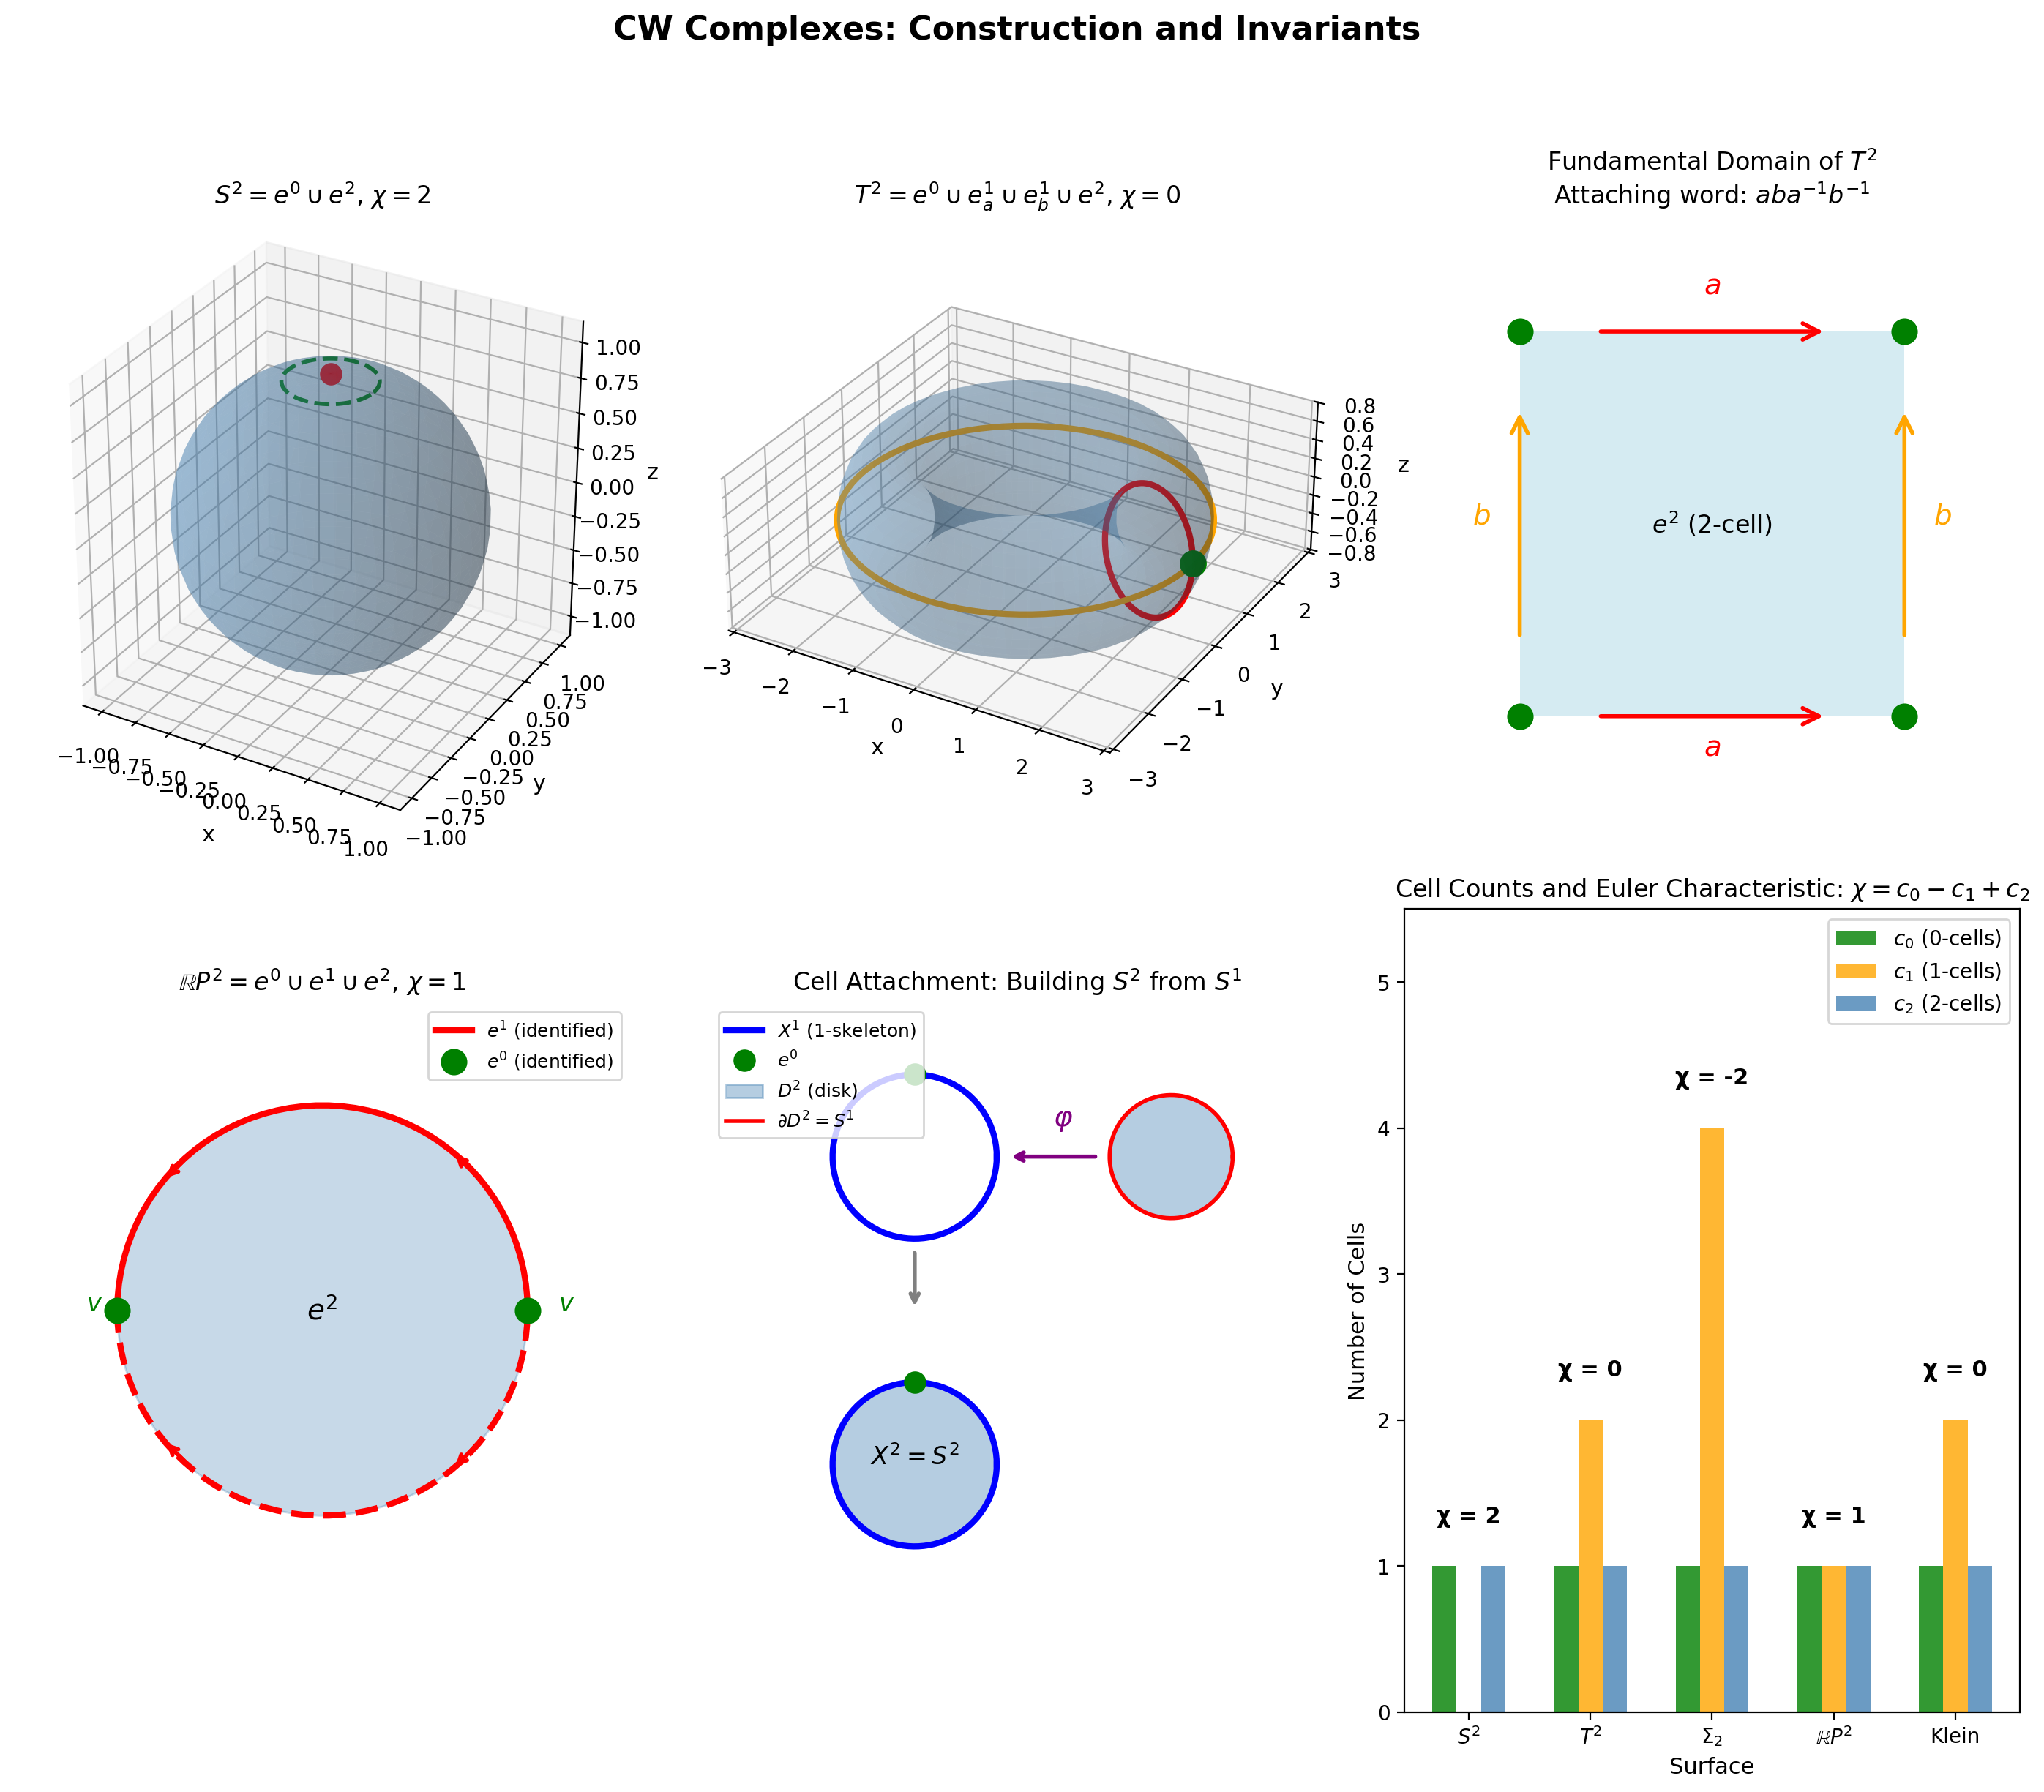


Figure saved to plot.png


In [10]:
# Create the comprehensive figure
fig = plt.figure(figsize=(14, 12))

# 3D subplot for S^2
ax1 = fig.add_subplot(2, 3, 1, projection='3d')
visualize_sphere_cw_structure(ax1)

# 3D subplot for Torus
ax2 = fig.add_subplot(2, 3, 2, projection='3d')
visualize_torus_cw_structure(ax2)

# 2D subplot for fundamental domain
ax3 = fig.add_subplot(2, 3, 3)
visualize_fundamental_domain(ax3)

# 2D subplot for RP^2
ax4 = fig.add_subplot(2, 3, 4)
visualize_rp2_construction(ax4)

# 2D subplot for cell attachment
ax5 = fig.add_subplot(2, 3, 5)
visualize_cell_attachment(ax5)

# Bar chart for Euler characteristic
ax6 = fig.add_subplot(2, 3, 6)
plot_euler_characteristic_formula(ax6)

plt.suptitle('CW Complexes: Construction and Invariants', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()

# Save the figure
plt.savefig('cw_complexes_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to plot.png")

## 5. Cellular Homology

One of the most powerful applications of CW complexes is in computing **cellular homology**. The chain complex is:

$$\cdots \xrightarrow{\partial_{n+1}} C_n(X) \xrightarrow{\partial_n} C_{n-1}(X) \xrightarrow{\partial_{n-1}} \cdots \xrightarrow{\partial_1} C_0(X) \to 0$$

where $C_n(X)$ is the free abelian group generated by the $n$-cells.

### 5.1 Boundary Maps

The boundary map $\partial_n: C_n(X) \to C_{n-1}(X)$ is given by:

$$\partial_n(e^n_\alpha) = \sum_\beta d_{\alpha\beta} \, e^{n-1}_\beta$$

where $d_{\alpha\beta}$ is the **degree** of the map $S^{n-1} \to S^{n-1}$ obtained by composing:
- The attaching map $\varphi_\alpha: S^{n-1} \to X^{n-1}$
- The projection $X^{n-1} \to X^{n-1}/X^{n-2} \cong \bigvee_\beta S^{n-1}_\beta$
- The collapse to $S^{n-1}_\beta$

### 5.2 Homology Groups

The **$n$-th homology group** is:

$$H_n(X) = \ker(\partial_n) / \text{im}(\partial_{n+1}) = Z_n(X) / B_n(X)$$

The **Betti numbers** $\beta_n = \text{rank}(H_n(X))$ satisfy:

$$\chi(X) = \sum_{n=0}^{\infty} (-1)^n \beta_n$$

## 6. Conclusion

CW complexes provide a powerful framework for:
1. **Constructing** topological spaces systematically
2. **Computing** algebraic invariants like homology
3. **Proving** theorems via inductive arguments on skeleta

The flexibility of cell attachments, combined with the computational tractability of cellular homology, makes CW complexes indispensable in modern algebraic topology.